In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'C:\Users\rjhcl\big data mart sales problem\train.csv')
test = pd.read_csv(r'C:\Users\rjhcl\big data mart sales problem\test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
test.shape

(5681, 11)

In [6]:
train.shape

(8523, 12)

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


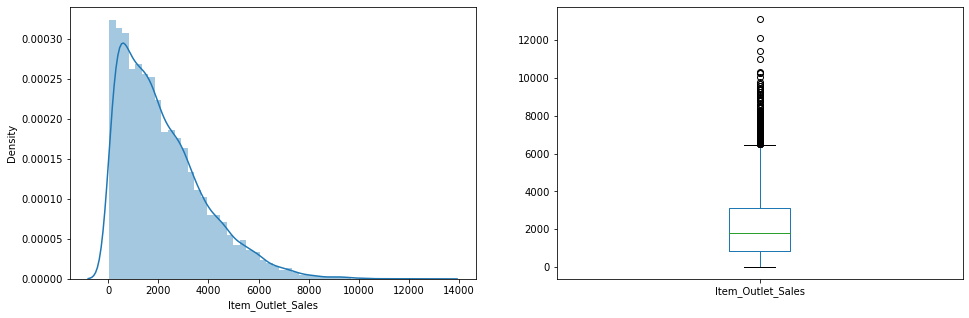

In [7]:
# Visulaizing the target variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'])


plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))


plt.show()

<AxesSubplot:title={'center':'Item_Fat_Content'}>

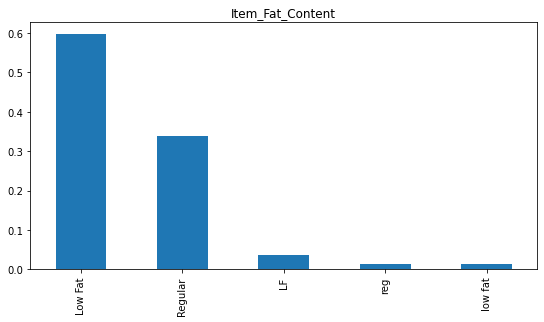

In [9]:
# fat content visualization
# from this plot we can see that most of the items are low fat content

plt.figure(1)
plt.subplot(221)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Fat_Content")

<AxesSubplot:title={'center':'Item_Type'}>

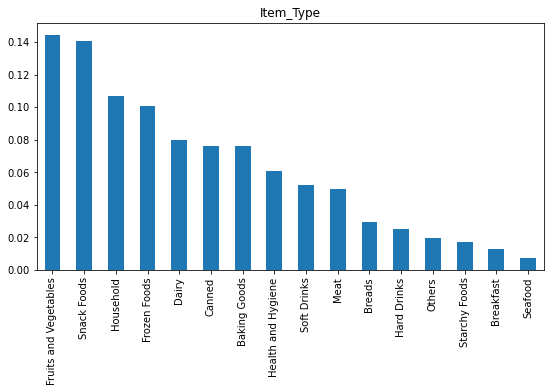

In [10]:
# item type visualization
# from this graph we can see most of the items are fruits and vegetables
plt.subplot(222)
train['Item_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Type")

# As we can see Item Fat content is showing regular and low fats in different names so lets change it

In [12]:
train['Item_Fat_Content'].replace('Low Fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('LF', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('low fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

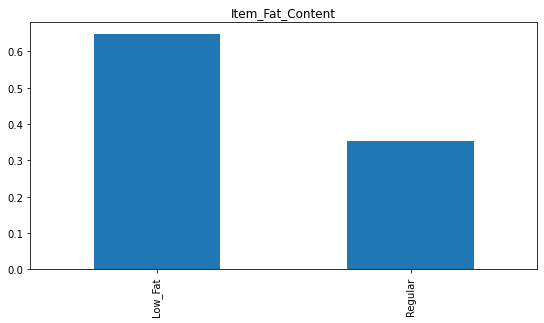

In [13]:
# now we have the total value of item fat content
# here we can see most of the items are low fat
plt.figure(1)
plt.subplot(221)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Fat_Content")
plt.show()

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


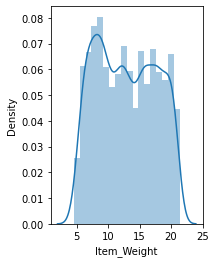

In [14]:
# data distribution of item weight
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Item_Weight'])

plt.show()
# as we can see data is distributed properly

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


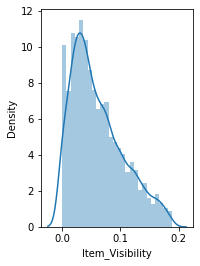

In [15]:
# data distribution of item visibility
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Item_Visibility'])


plt.show()
# as we can see data is distributed properly

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


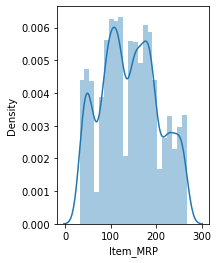

In [16]:
# data distribution of item MRP
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Item_MRP'])

plt.show()
# as we can see data is distributed properly

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


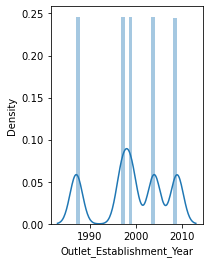

In [17]:
# data distribution of outlet establishment year
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['Outlet_Establishment_Year'])

plt.show()
# as we can see data is distributed properly

<AxesSubplot:xlabel='Item_Fat_Content'>

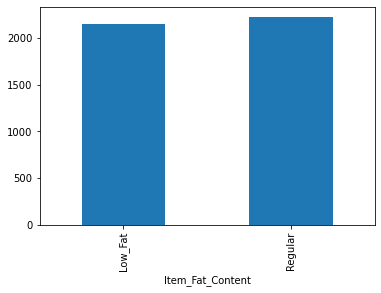

In [18]:
# now we have to see their relationship 
# first lets see the relationship of item fat content with item outlet sales
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Item_Type'>

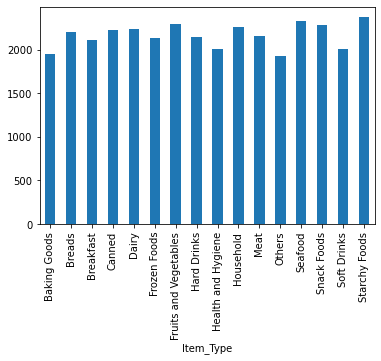

In [19]:
train.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Outlet_Size'>

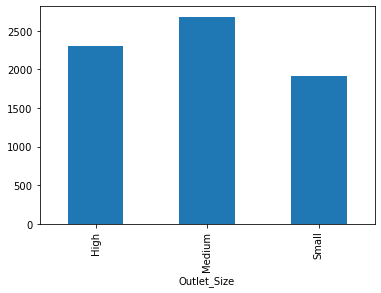

In [22]:
train.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()
# most of them are medium outlet size

<AxesSubplot:xlabel='Outlet_Type'>

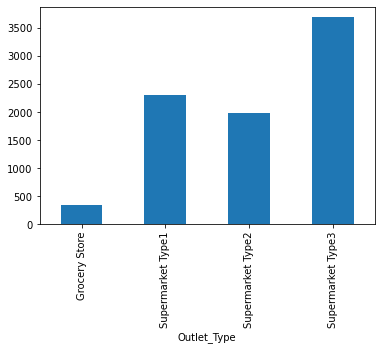

In [23]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()
# most of them are supermarket(type 3)

In [24]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

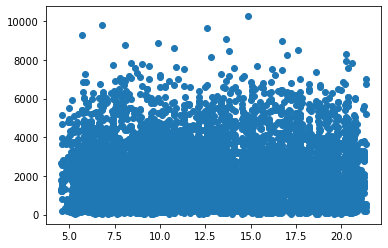

In [26]:
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'])

# Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation

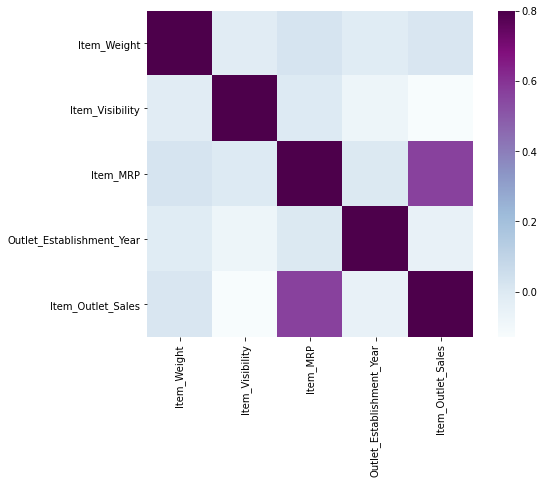

In [27]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [28]:
# Checking Null Values in train dataset
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# There are missing values in Item_Weight and Outlet_size features.

In [29]:
# Lets Deal with Item_Weight First which is a Numerical Variable
train['Item_Weight'].value_counts()

# As we can see its spread 
train['Item_Weight'].fillna(train['Item_Weight'].mode()[0], inplace=True)

In [30]:
# Lets Deal with Outlet_Size First which is a Categorical Variable
train['Outlet_Size'].value_counts()

# As we can see its spread 
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [31]:
# Checking How many Null Values in training dataset
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Item_Outlet_Sales contains outliers so we have to treat them

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


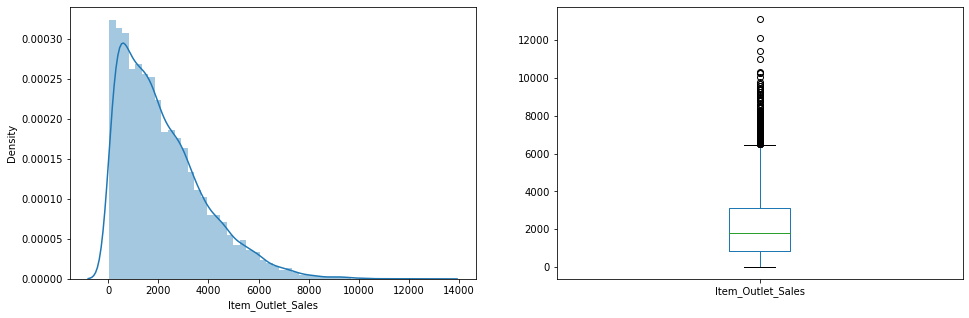

In [32]:
# Visulaize the target variable

plt.figure(1)
plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'])

plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(16,5))

plt.show()

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

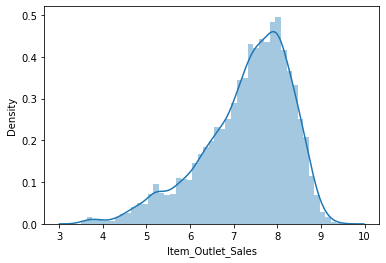

In [33]:
# As We can see the variable is not normally distributed so be normalize the varaible
train['Item_Outlet_Sales'] = np.log(train['Item_Outlet_Sales'])
sns.distplot(train['Item_Outlet_Sales'])

In [34]:
# Setting X and y 
X = train.iloc[:, 1:-1].values
y = train.iloc[:, -1].values

In [35]:
# Converting Categorical variables into dummys
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()

# Item_Fat_Content
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# Item_Type
X[:,3] = labelencoder_X.fit_transform(X[:,3])

# Outlet_Identifier
X[:,5] = labelencoder_X.fit_transform(X[:,5])

# Outlet_Size
X[:,7] = labelencoder_X.fit_transform(X[:,7])

# Outlet_Location_Type
X[:,8] = labelencoder_X.fit_transform(X[:,8])

# Outlet_Location_Type
X[:,9] = labelencoder_X.fit_transform(X[:,9])

# Dummy Varaibles
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Fitting the Random Forest Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [39]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([7.83305344, 8.29164592, 7.76216358, ..., 8.17822505, 5.70989811,
       8.3639678 ])

In [41]:
import pickle
with open("big_data_model","wb") as m:
    pickle.dump(y_pred, m)